# TITANIC SURVIVAL PREDICTION

dependencies in Python are third-party libraries and frameworks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.metrics import (f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,classification_report,precision_recall_curve)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree

"NumPy is a Python library used for working with arrays."
"Pandas is a powerful and versatile library that simplifies tasks of data manipulation in Python"  
"Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python"
"pyplot function makes some changes to a figure: e.g.,creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc."
"Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive."
"Sklearn is a Python library that is widely used for various machine learning tasks"


Data collection and processing


In [4]:
# Load the data 
df = pd.read_csv('Titanic-Dataset.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex      Age  \
0                              Braund, Mr. Owen Harris    male 22.00000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00000   
2                               Heikkinen, Miss. Laina  female 26.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00000   
4                             Allen, Mr. William Henry    male 35.00000   
..                                                 ...     ...      ...   
886               

In [5]:
#show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


In [6]:
df.shape #(rows,columns)

(891, 12)

896 rows and 12 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

in age we have 177 null values and in cabin we have 687 null values

HANDLING THE MISSING VALUES

In [9]:
#drop the cabin column from dataset since the missing values are alot,axis=1 represents column
df=df.drop(columns='Cabin',axis=1)

In [10]:
#fill the missing age values using mean of age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
#fill the embarked column using mode of embarked column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(df['Embarked'].mode()[0])

S


In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [17]:
df['Age'].value_counts()

29.69912    177
24.00000     30
22.00000     27
18.00000     26
28.00000     25
30.00000     25
19.00000     25
21.00000     24
25.00000     23
36.00000     22
29.00000     20
35.00000     18
32.00000     18
26.00000     18
27.00000     18
31.00000     17
16.00000     17
34.00000     15
20.00000     15
23.00000     15
33.00000     15
39.00000     14
40.00000     13
17.00000     13
42.00000     13
45.00000     12
38.00000     11
4.00000      10
2.00000      10
50.00000     10
44.00000      9
47.00000      9
48.00000      9
54.00000      8
9.00000       8
1.00000       7
51.00000      7
37.00000      6
52.00000      6
41.00000      6
3.00000       6
14.00000      6
49.00000      6
58.00000      5
15.00000      5
43.00000      5
62.00000      4
56.00000      4
8.00000       4
60.00000      4
11.00000      4
5.00000       4
6.00000       3
7.00000       3
65.00000      3
61.00000      3
46.00000      3
10.00000      2
64.00000      2
13.00000      2
63.00000      2
0.75000       2
70.00000

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [20]:
df.describe()
#statistical description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,13.00202,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,22.00000,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,29.69912,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,35.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


DATA VISUALIZATION

In [21]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

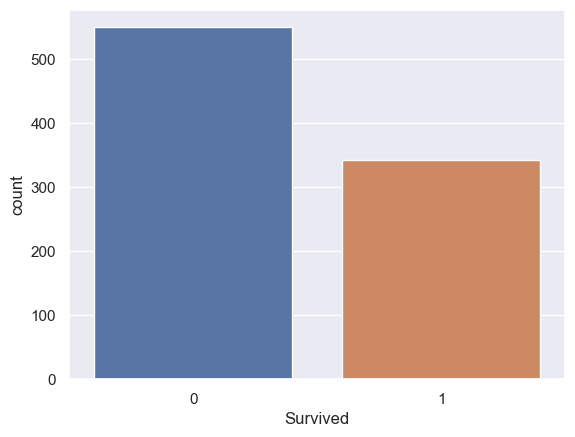

In [22]:
#countplot
sns.countplot('Survived',data=df)

0 = Blue = Didn't Survived |||
1 = Brown = Survive

<AxesSubplot:xlabel='Sex', ylabel='count'>

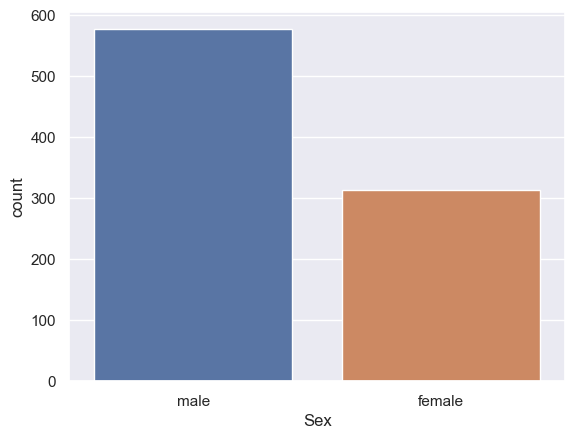

In [23]:
sns.countplot('Sex',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

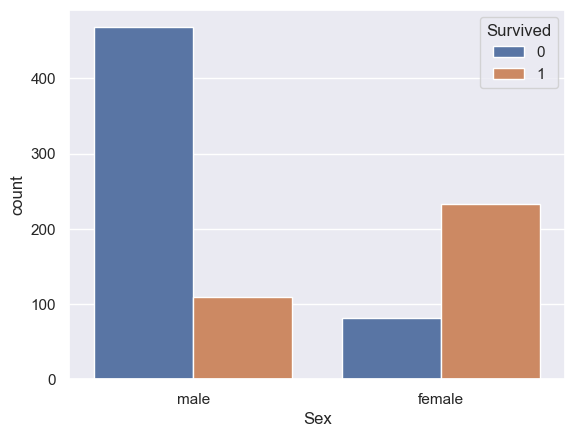

In [24]:
sns.countplot('Sex', hue='Survived' ,data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

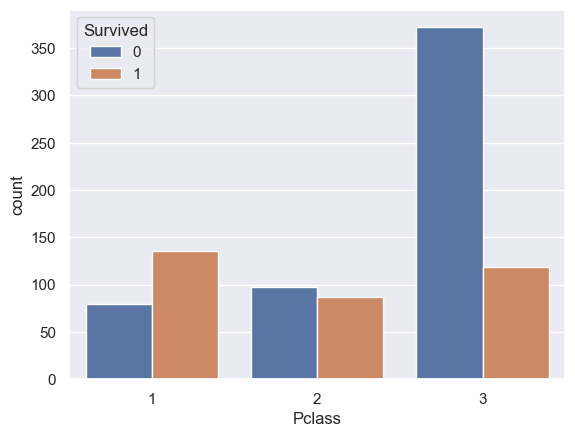

In [25]:
sns.countplot('Pclass', hue='Survived' ,data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

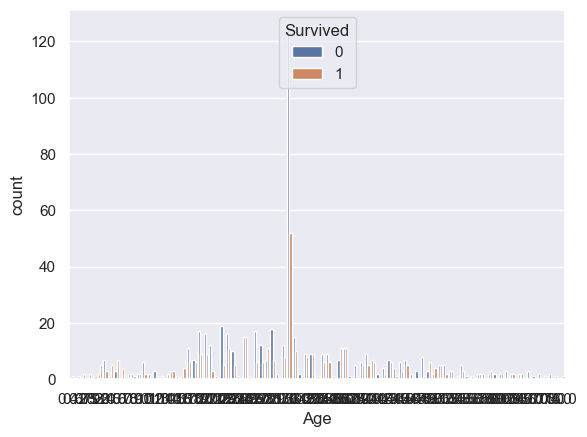

In [26]:
sns.countplot('Age', hue='Survived' ,data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

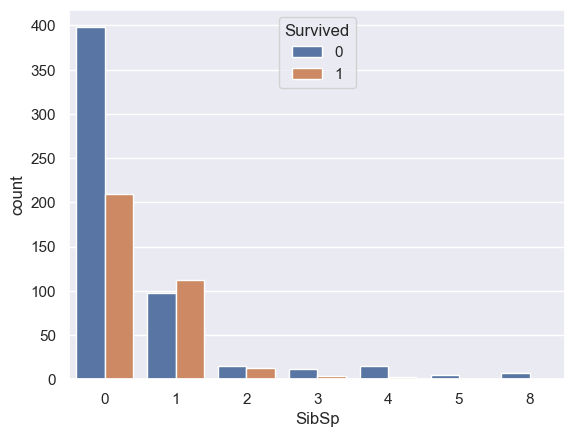

In [27]:
sns.countplot('SibSp', hue='Survived' ,data=df)

Converting the data in numerical for

<AxesSubplot:xlabel='Parch', ylabel='count'>

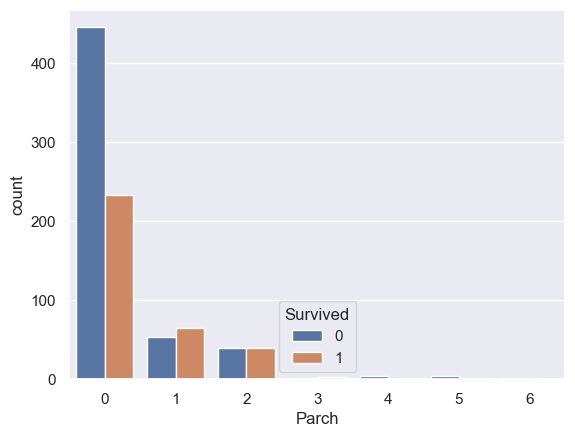

In [28]:
sns.countplot('Parch', hue='Survived' ,data=df)

<AxesSubplot:xlabel='Fare', ylabel='count'>

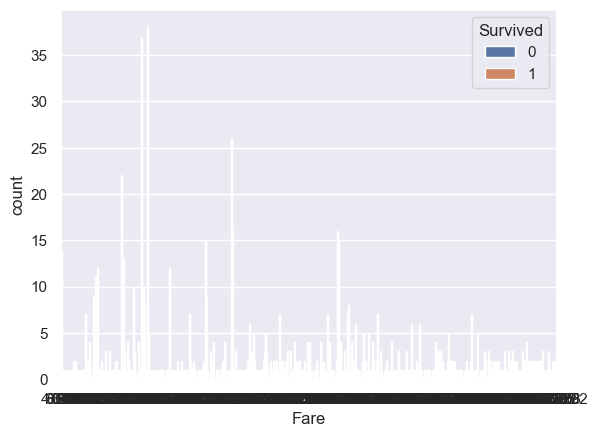

In [29]:
sns.countplot('Fare', hue='Survived' ,data=df)

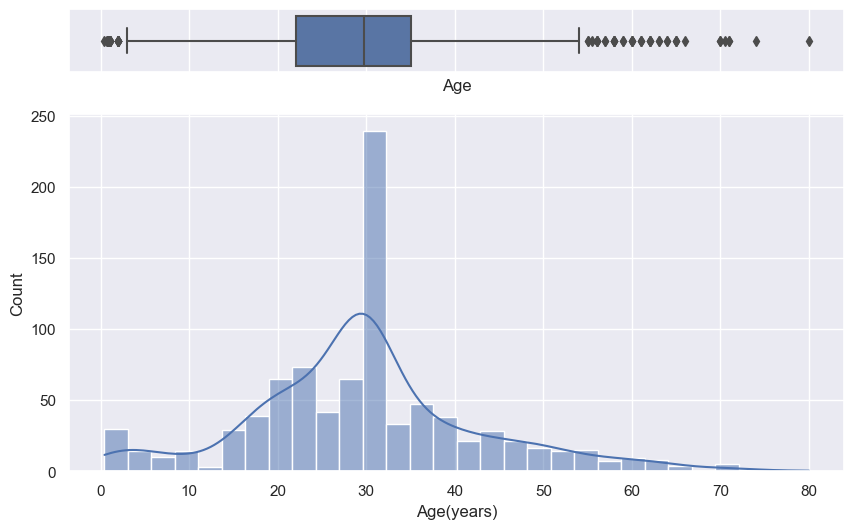

In [56]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(data=df, x="Age", ax=ax_box)
sns.histplot(data=df, x="Age", kde=True, ax=ax_hist)
ax_box.set(xlabel="Age")
plt.xlabel("Age(years)")

plt.show()

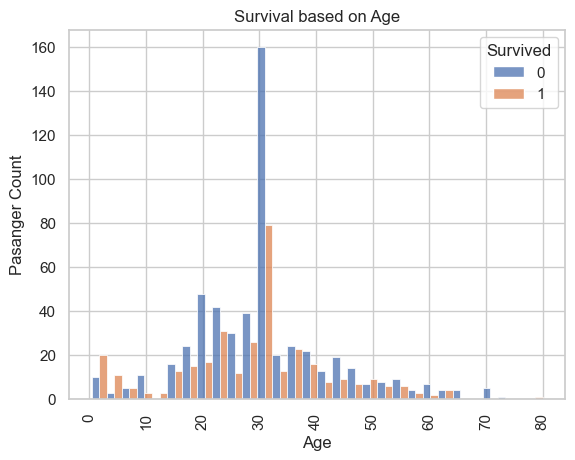

In [57]:
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Age", hue="Survived", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Pasanger Count")
plt.title("Survival based on Age")
plt.show()


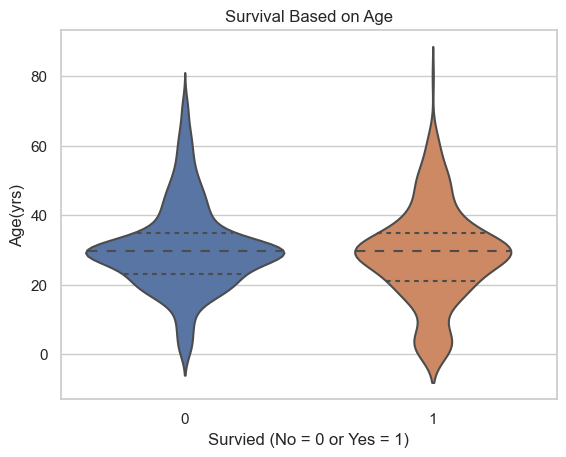

In [58]:
sns.violinplot(data=df, x='Survived', y= "Age" , inner='quartile')
plt.title("Survival Based on Age")
plt.xlabel("Survied (No = 0 or Yes = 1)")
plt.ylabel("Age(yrs)")

plt.show()

In [30]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00000,1,0,A/5 21171,7.25000,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00000,1,0,PC 17599,71.28330,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00000,0,0,STON/O2. 3101282,7.92500,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00000,1,0,113803,53.10000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.00000,0,0,373450,8.05000,0


Clean the dataset 
Remove unnessary columns and the Survived column
add survived column in another dataframe

In [34]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived','Embarked','SibSp','Parch','Fare'],axis=1)

In [35]:
y=df['Survived']

In [36]:
print(x)

     Pclass  Sex      Age
0         3    0 22.00000
1         1    1 38.00000
2         3    1 26.00000
3         1    1 35.00000
4         3    0 35.00000
..      ...  ...      ...
886       2    0 27.00000
887       1    1 19.00000
888       3    1 29.69912
889       1    0 26.00000
890       3    0 32.00000

[891 rows x 3 columns]


In [37]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


TRAINING

Split the dataset for training and testing

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=4 )

In [39]:
print(x.shape,x_train.shape,y_train.shape)

(891, 3) (712, 3) (712,)


In [40]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (712,) (179,)


In [41]:
len(x_train)

712

In [42]:
len(x_test)

179

In [43]:
len(y_train)

712

In [44]:
len(y_test)

179

LOGISTIC REGRESSION

In [45]:
model = LogisticRegression()

In [46]:
model.fit(x_train,y_train)

LogisticRegression()

 Accuracy

In [47]:
x_train_prediction = model.predict(x_train)

In [48]:
print(x_train_prediction)

[0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 1 

In [49]:
accuracy_of_trained_data = accuracy_score(y_train,x_train_prediction)
#accuracy of training data

In [50]:
print(accuracy_of_trained_data)

0.7949438202247191


In [51]:
x_test_prediction=model.predict(x_test)

In [52]:
print(x_test_prediction)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [53]:
accuracy_of_test_data=accuracy_score(y_test,x_test_prediction)

In [54]:
print(accuracy_of_test_data)

0.8212290502793296
